<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/DLQuestion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Importing neccessary libraries
# Python program using numpy for arranging a given set of data into a table
# Data processing to read CSV file 
import pandas as pd 
# Keras is the neural network library
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# From keras.models import sequential model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# Python program using Matplotib for forming a linear plot
from matplotlib import pyplot
# Importing the library for splitting the data
from sklearn.model_selection import train_test_split
# Importing one hot encoding library
from keras.utils.np_utils import to_categorical
import re
# importing preprocessing library
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from keras.models import model_from_json

In [76]:
# Reading the data from sentiment.csv file
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [77]:
# This syntax is using to the data which has unnecessary things from text and convert them to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
data.head(8)

,text,sentiment
0,rt nancyleegrahn how did everyone feel about t...,Neutral
1,rt scottwalker didnt catch the full gopdebate ...,Positive
2,rt tjmshow no mention of tamir rice and the go...,Neutral
3,rt robgeorge that carly fiorina is trending h...,Positive
4,rt danscavino gopdebate w realdonaldtrump deli...,Positive
5,rt gregabbott_tx tedcruz on my first day i wil...,Positive
6,rt warriorwoman91 i liked her and was happy wh...,Negative
7,going on msnbc live with thomasaroberts around...,Neutral


In [78]:
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
# Tokenizing the data and convert the text to sequences.
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
# Addition of padding to ensure that all the sequences have the same shape.
X = pad_sequences(X)
print(X)


[[   0    0    0 ...   51 1039    1]
 [   0    0    0 ... 1577 1356  847]
 [   0    0    0 ...   10  696  518]
 ...
 [   0    0    0 ...   68   62    3]
 [   0    0    0 ... 1112 1588   81]
 [   0    0    0 ...  196    3  880]]


In [79]:
embed_dim = 128
lstm_out = 196
# Function to create a model
def createmodel():
    # Creating a model
    model = Sequential()
    # embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters.
    # these parameters helps to achieve good results
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3,activation='softmax'))
    # Compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model
    print(model.summary())

In [80]:
# LabelEncoder to encode the text into categorical integer values
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
# One-hot-encoder 
# utils.to_categorical is used to convert array of labeled data to one-hot vector
y = to_categorical(integer_encoded)
# Splitting the dataset into test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(9293, 28) (9293, 3)
(4578, 28) (4578, 3)


In [81]:
batch_size = 40
model = createmodel()
# Model.fit() using to padded training data and validating the data.
# epochs is used to  Number of times the learning algorithm will work through the entire training data set
history= model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)
# Evaluating the model
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
print(score)
print(acc)
print(model.metrics_names)

Epoch 1/5
233/233 - 37s - loss: 0.8338 - accuracy: 0.6424
Epoch 2/5
233/233 - 37s - loss: 0.6784 - accuracy: 0.7049
Epoch 3/5
233/233 - 37s - loss: 0.6154 - accuracy: 0.7399
Epoch 4/5
233/233 - 38s - loss: 0.5664 - accuracy: 0.7637
Epoch 5/5
233/233 - 37s - loss: 0.5257 - accuracy: 0.7791
115/115 - 2s - loss: 0.8102 - accuracy: 0.6584
0.8101969361305237
0.6583660840988159
['loss', 'accuracy']


In [82]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [83]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [84]:
#evaluate model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

accuracy: 77.28%


In [85]:
import numpy as np
tweet = ['A lot of good things are happening. We are respected again throughout the world, and that is a great thing.@realDonaldTrump']
# Vectorizing the tweet by the pre-fitted tokenizer instance
tweet = tokenizer.texts_to_sequences(tweet)
# Padding the tweet to have exactly the same shape as `embedding_2` input
tweet = pad_sequences(tweet, maxlen=28, dtype='int32', value=0)
print(tweet)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)
loaded_model.predict(twt,batch_size=1,verbose = 2)

[[  0   0   0   0   0   0   0   0   0   0   7 445   5 146 292  35  30  35
  371   2 349   8  17   6   7 153 265  23]]
1/1 - 0s
[0.13154082 0.03524611 0.8332131 ]
1/1 - 0s


array([[0.13154082, 0.03524611, 0.8332131 ]], dtype=float32)

dict_keys(['loss', 'accuracy'])


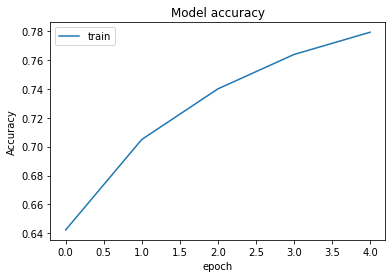

In [86]:
# Bonus Question:
# Printing the keys from history.
print(history.history.keys())
# Analyze by visualizing data.
# Summarize history for an accuracy.
pyplot.plot(history.history['accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train'], loc= 'upper left')
pyplot.show()


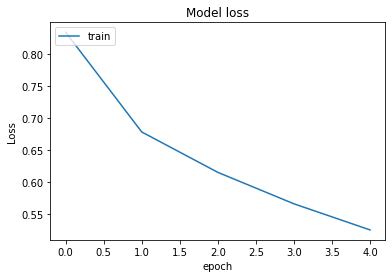

In [87]:
# Summarize history for the loss.
pyplot.plot(history.history['loss'])
pyplot.title('Model loss')
pyplot.xlabel('epoch')
pyplot.ylabel('Loss')
pyplot.legend(['train'], loc= 'upper left')
pyplot.show()